In [26]:
import pandas as pd

In [27]:
df =pd.read_csv('salary_dt.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
df['company'] = le.fit_transform(df['company'])
df['job'] = le.fit_transform(df['job'])
df['degree'] = le.fit_transform(df['degree'])

In [30]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop('salary_more_then_100k', axis=1)
y = df[['salary_more_then_100k']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model = DecisionTreeClassifier(criterion='entropy')

In [34]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
y_pred = dt_model.predict(X_test)

In [41]:
dt_model.score(X_test, y_test)

0.75

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2, 0],
       [1, 1]])

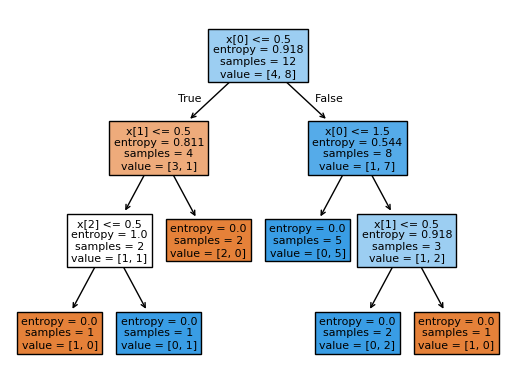

In [48]:
import matplotlib.pyplot as plt
plot_tree(dt_model, filled=True)
plt.show()